In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt, style; style.use('fivethirtyeight')
import seaborn as sns; sns.set(context='talk')

from IPython.display import display, HTML, IFrame

df = pd.read_csv('https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/data/twtc.csv?raw=true')
#df = pd.read_csv('https://jacobdanovitch.blob.core.windows.net/datasets/twtc.csv')
df

,name,key_mlbam,key_fangraphs,age,year,primary_position,eta,report,Arm,Changeup,...,Power,Run,Slider,Splitter,source,birthdate,mlb_played_first,debut_age,label,text
0,**Luke Heimlich,0,sa3008629,22.3,2018,LHP,0,Heimlich is a Level 1 sex offender and wouldn'...,0,55,...,0,0,0,0,fg_2018 Draft,1996-02-03,0,0.00,0,PERSON is a Level 1 sex offender and wouldn't ...
1,**Noah Song,679977,sa917943,22.0,2019,RHP,0,The way teams value Song depends on whether or...,0,45,...,0,0,55,0,fg_2019 Draft,1899-12-30,0,0.00,0,The way teams value PERSON depends on whether ...
2,A.J. Alexy,669935,0,19.7,2018,RHP,2020,Willie Calhoun was the headliner in the three-...,0,50,...,0,0,0,0,mlbam,1998-04-21,0,0.00,-1,PERSON PERSON was the headliner in the three-p...
3,A.J. Alexy,669935,0,18.7,2017,RHP,2020,Alexy made headlines for all the wrong reasons...,0,50,...,0,0,0,0,mlbam,1998-04-21,0,0.00,-1,PERSON made headlines for all the wrong reason...
4,A.J. Cole,595918,11467,22.0,2014,RHP,2015,"The Nationals have acquired Cole twice, first...",0,55,...,0,0,0,0,mlbam,1992-01-05,2015,23.01,1,"The ORGANIZATION have acquired PERSON twice, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170,Zech Lemond,607617,0,22.2,2015,RHP,2017,Lemond set a Rice record with 14 saves as soph...,0,45,...,0,0,0,0,mlbam,1992-10-09,0,0.00,0,PERSON set a Rice record with 14 saves as soph...
9171,Zech Lemond,607617,0,21.2,2014,RHP,0,Lemond set the Rice record for saves last year...,0,45,...,0,0,0,0,mlbam,1899-12-30,0,0.00,0,PERSON set the PERSON record for saves last ye...
9172,Zechariah Lemond,607617,0,21.2,2014,RHP,2017,"As a sophomore, in 2013, Lemond set the Rice r...",0,45,...,0,0,0,0,mlbam,1992-10-09,0,0.00,0,"As a sophomore, in 2013, PERSON set the ORGANI..."
9173,Zeke Spruill,543809,3873,23.3,2013,RHP,2013,"Another prospect in the Justin Upton haul, Sp...",0,50,...,0,0,50,0,mlbam,1989-09-11,2013,23.32,1,"Another prospect in the ORGANIZATION haul, PE..."


<div style='text-align: center;'>
    <h1>CMSAC '19: Trouble with the Curve</h1>
    <h2>Jacob Danovitch</h2>
    <h3>Carleton University | Microsoft Cortana</h3>
</div>

## Why the name?

<br/>

<figure>
  <img src="https://static01.nyt.com/images/2012/09/21/arts/21TROUBLE_SPAN/JPTROUBLE-jumbo.jpg" style="width:50%;">
  <figcaption>
      Source:
      <a href="https://www.nytimes.com/2012/09/21/movies/trouble-with-the-curve-with-clint-eastwood-and-amy-adams.html">
          nytimes
      </a>
  </figcaption>
</figure>

## The Dataset

* Scouting reports from MLB.com & FanGraphs.com circa 2013
* 20-80 grades, position, age player IDs where possible

In [3]:
print(f'Size: {df.shape}')
df.sample(3)

Size: (9175, 26)


,name,key_mlbam,key_fangraphs,age,year,primary_position,eta,report,Arm,Changeup,...,Power,Run,Slider,Splitter,source,birthdate,mlb_played_first,debut_age,label,text
4860,Jose Rondon,602922,14140,21.8,2016,SS,2017,Rondon spent three years in Rookie ball after ...,55,0,...,30,50,0,0,mlbam,1994-03-03,2016,21.85,1,PERSON spent three years in GPE ball after he ...
2070,Corey Ray,641999,0,21.3,2016,OF,0,Ray ranked as the Draft's top position prospec...,50,0,...,55,60,0,0,mlbam,1899-12-30,0,0.00,0,PERSON ranked as the ORGANIZATION's top positi...
5247,Kevin Alcantara,682634,0,15.5,2018,OF,0,The athletic Alcantara is a natural center fi...,50,0,...,55,70,0,0,mlbam,1899-12-30,0,0.00,0,The athletic PERSON is a natural center field...


### Dataset Statistics

In [4]:
df_label_mask = (df.drop(columns='label') == 0).assign(label=False)
df = df.mask(df_label_mask)

df.describe().T[['mean', 'std', 'min', '50%', 'max']]

,mean,std,min,50%,max
age,20.810431,2.307676,15.30,21.0,31.90
year,2016.715095,1.979656,2013.00,2017.0,2019.00
eta,2018.802799,2.422862,2013.00,2019.0,2025.00
Arm,53.824127,6.897962,30.00,55.0,80.00
Changeup,49.858290,5.364976,30.00,50.0,70.00
Control,49.205290,5.059892,30.00,50.0,70.00
Curveball,52.929583,5.675287,35.00,55.0,70.00
Cutter,52.475000,4.936723,40.00,50.0,70.00
Fastball,59.531873,6.665786,40.00,60.0,80.00
Field,51.633871,5.503923,30.00,50.0,80.00


Positional distribution:

In [5]:
(df.primary_position.value_counts() / len(df)).to_frame().round(4).style.bar()

,primary_position
RHP,0.356600
OF,0.206800
LHP,0.119600
SS,0.117100
C,0.063800
3B,0.057900
2B,0.039500
1B,0.034700
UTIL,0.004300


Label distribution:

In [6]:
(df.label.value_counts() / len(df)).round(4).to_frame().style.bar()

,label
0,0.617300
1,0.230400
-1,0.152300


## The 20-80 Scale

How do scouts grade prospects by position?

* Lefties have better control
* Righties have better fastballs

In [7]:
pitch_cols = ['Control', 'Fastball', 'Changeup', 'Curveball', 'Cutter', 'Slider', 'Splitter']

is_pitcher_mask = df.primary_position.isin(['LHP', 'RHP'])
has_label_mask = (df.label != -1) # ~df.label.isnull()

pitch_df = df[is_pitcher_mask & has_label_mask]
pitch_df.mask(df == 0).groupby('primary_position').agg('mean')[pitch_cols].T.style.highlight_max(axis=1, color='dodgerblue')

<ipython-input-7-f440f452fdca>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pitch_df.mask(df == 0).groupby('primary_position').agg('mean')[pitch_cols].T.style.highlight_max(axis=1, color='dodgerblue')


primary_position,LHP,RHP
Control,49.837079,48.955556
Fastball,56.357548,60.645794
Changeup,51.123256,49.355189
Curveball,52.684211,52.886742
Cutter,50.340909,52.980132
Slider,52.026694,52.912010
Splitter,55.000000,52.941176


* Up-the-middle spots are more defensive
* Corner guys are more power/arm oriented
* C, UTIL are jack-of-all-trades


In [8]:
hit_cols = ['Hit', 'Power', 'Field', 'Run', 'Arm']

hit_df = df[~is_pitcher_mask & has_label_mask]
hit_df.mask(df == 0).groupby('primary_position').agg('mean')[hit_cols].T.style.highlight_max(axis=1, color='dodgerblue')

<ipython-input-8-7857f11ad465>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hit_df.mask(df == 0).groupby('primary_position').agg('mean')[hit_cols].T.style.highlight_max(axis=1, color='dodgerblue')


primary_position,1B,2B,3B,C,OF,SS,UTIL
Hit,50.032374,52.289655,49.491484,47.660215,49.557652,50.081717,51.000000
Power,55.143885,43.103448,53.046229,47.933333,49.350804,42.789474,41.200000
Field,47.866906,49.931034,48.931707,50.939785,52.523410,53.097087,51.000000
Run,33.615108,51.575862,40.578049,34.849462,54.516061,53.415512,50.000000
Arm,50.187050,49.306897,56.143552,56.000000,52.285615,55.987552,54.400000


### Inter-grade correlations

<ipython-input-9-6632960c69e4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hit_df.drop(columns=['mlb_played_first', 'debut_age', 'year', *pitch_cols]).corr(),
<ipython-input-9-6632960c69e4>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pitch_df.drop(columns=['mlb_played_first', 'debut_age', 'year', *hit_cols]).corr(),


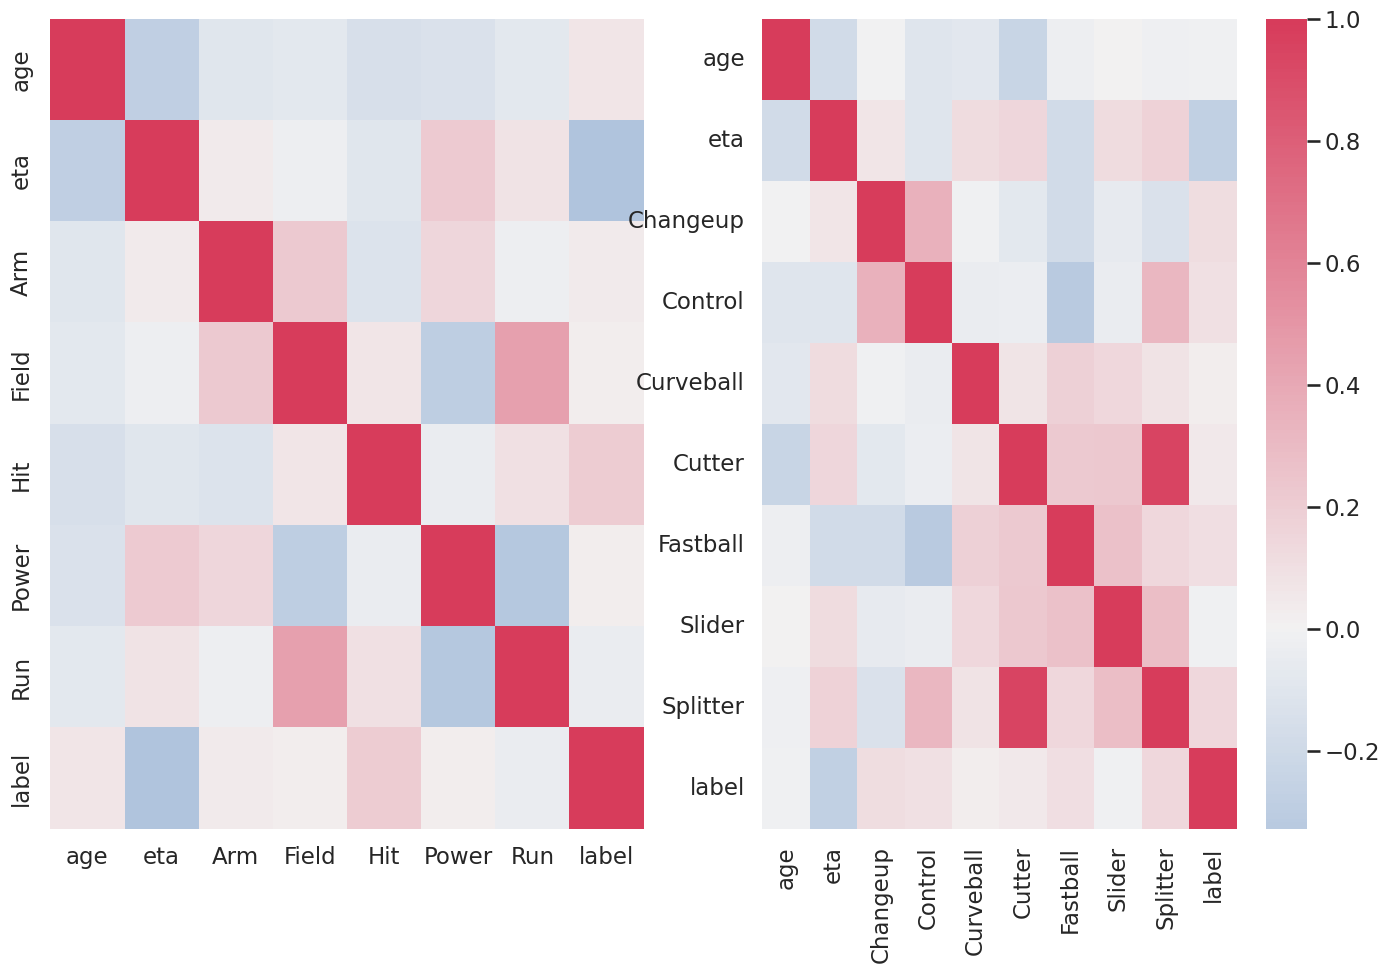

In [9]:
cmap=sns.diverging_palette(250, 5, as_cmap=True)
fig, (ax1, ax2) = plt.subplots(figsize = (15,10), ncols=2)

sns.heatmap(
    hit_df.drop(columns=['mlb_played_first', 'debut_age', 'year', *pitch_cols]).corr(),
    cmap=cmap,
    center=0,
    ax=ax1,
    cbar=False
)

sns.heatmap(
    pitch_df.drop(columns=['mlb_played_first', 'debut_age', 'year', *hit_cols]).corr(),
    cmap=cmap,
    center=0,
    ax=ax2
)

plt.show()

## Identifying Successful Prospects

### How are successful prospects described?

<figure>
    https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/notebooks/assets/img/label_viz.png
    <figcaption>What do you notice about the most frequent words used to describe successful prospects?</figcaption>
</figure>

All the most discriminative terms are player names!

In [17]:
pd.read_csv('https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/notebooks/assets/label_term_freqs.csv?raw=true').nlargest(10, 'MLB Score')

,term,MiLB freq,MLB freq,MLB Score
35864,alford,0,47,1.000000
132332,nix,0,43,0.999147
29913,cecchini,0,38,0.997598
109491,robles,0,35,0.996513
36508,banda,0,34,0.996077
130563,fried,0,31,0.994667
79964,arroyo,0,30,0.994142
189461,ciuffo,0,30,0.994142
102142,tellez,0,29,0.993580
219935,grisham,0,29,0.993580


https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/notebooks/assets/img/processed_label_viz.png

<figure>
    <img src="assets/img/processed_label_viz.png"></img>
    <figcaption>Post-entity masking</figcaption>
</figure>

Not perfect, but better!

In [15]:
pd.read_csv('https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/notebooks/assets/processed_label_term_freqs.csv?raw=true').nlargest(10, 'MLB Score')

,term,MiLB freq,MLB freq,MLB Score
716,trade,210,218,1.000000
582,the package,20,42,0.999735
1151,at age,144,167,0.999512
236,as part,87,105,0.997560
2214,traded,116,118,0.997343
9034,youngest,54,78,0.997062
744,three team,17,35,0.997009
8289,that sent,39,61,0.996948
576,organization deal,34,56,0.996236
14306,age 20,30,53,0.996151


### Classifying successful prospects

#### Task Definition

* **Task**: Sequence of tokens $\longrightarrow$ binary label
* **Solution**: Hierarchical Attention Network (among others)

<!--
<figure style='display: flex; margin-bottom: 2%;'>
https://passage-1257910364.cos.na-siliconvalley.myqcloud.com/QANet_3.png
      <a href="http://fuyw.top/NLP_02_QANet/">
          fuyw.top
      </a>
  <img src='https://cdn-images-1.medium.com/max/2000/0*25KIIWK1G7BPJMgN.png' alt='attn' style='width: 50%; margin: auto;'></img>
  <figcaption style='font-size: small'>Source:
      <a href="https://mc.ai/self-attention-a-clever-compromise/">
          mc.ai
      </a>
  </figcaption>
</figure>
-->

<figure style='display: flex; margin-bottom: 2%;'>
  <img src='https://miro.medium.com/max/852/1*28XVtq2lOjOmZhcSgu1NmQ.png' alt='attn' style='width: 50%; margin: auto;'></img>
  <figcaption style='font-size: small'>Source:
    <a href="https://medium.com/analytics-vidhya/hierarchical-attention-networks-d220318cf87e">
        medium.com
    </a>
  </figcaption>
</figure>

#### Additional considerations

| Problem                   | Solution                      |
|---------------------------|-------------------------------|
| Heavy class imbalance     | Resampling + loss reweighting |
| Data sparsity             | Data augmentation             |
| (Relatively) small corpus | Pre-trained GloVe embeddings  |

#### Results

| Model             | Accuracy | F1     |
|-------------------|----------|--------|
| Bag-Of-Embeddings | 64.65%   | 53.78% |
| TextCNN           | 69.02%   | 56.42% |
| LSTM+SelfAttn     | 68.64%   | 54.65% |
| BCN               | 73.52%   | 43.33% |
| HAN               | 66.00%   | 54.07% |

<i style='font-size: small; float: left; position: absolute; bottom: 0;'>Hyperparameters: <a href="https://github.com/jacobdanovitch/jdnlp/blob/master/experiments/twtc.json">link</a></i>

https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/notebooks/assets/img/han.png

* Why did you use a HAN if it wasn't even the best one?


<figure style='display: flex; margin-bottom: 2%;'>
  <img src='https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/notebooks/assets/img/han.png' alt='attn' style='width: 50%; margin: auto;'></img>
  <figcaption style='font-size: small'>Source:
    <i style='font-size: small'>Yang, Z., Yang, D., Dyer, C., He, X., Smola, A.J., & Hovy, E.H. (2016). Hierarchical Attention Networks for Document Classification. HLT-NAACL.</i>
  </figcaption>
</figure>

Attention is not explanation!!

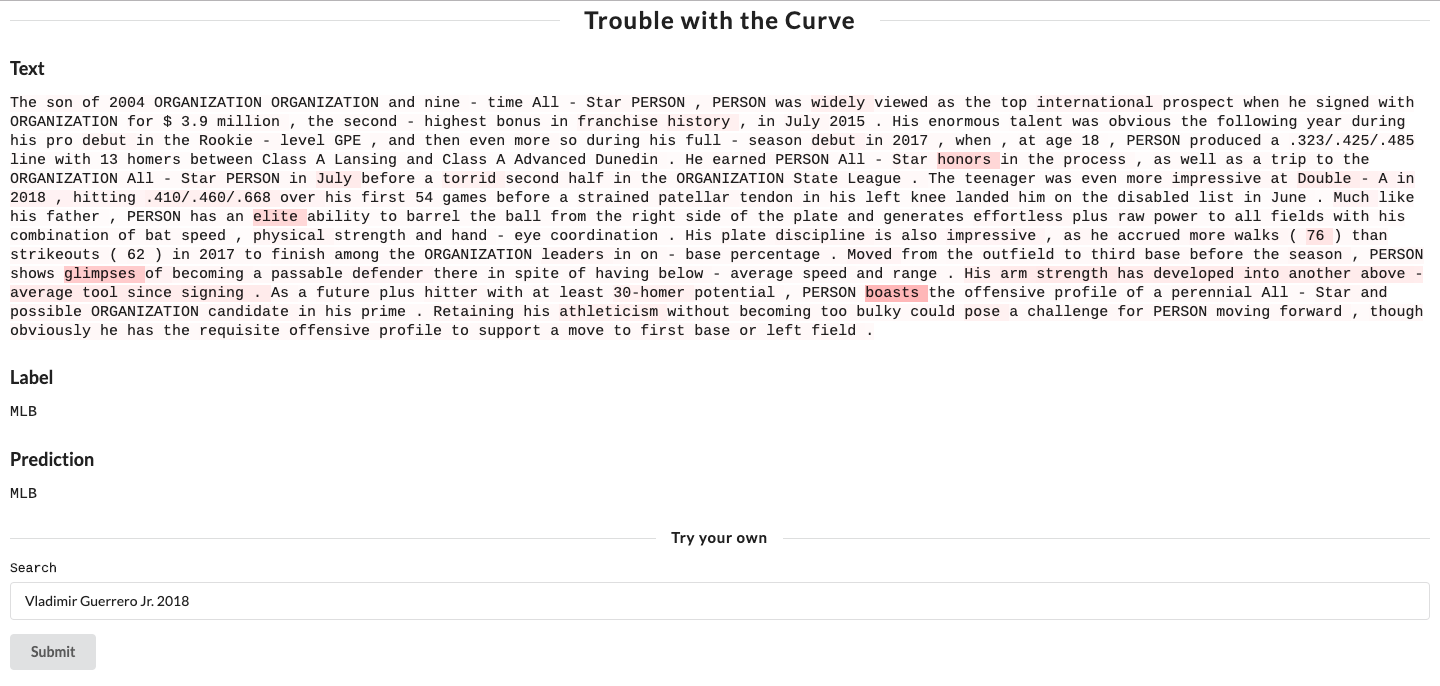

In [12]:
from IPython.display import Image

display(Image('https://i.imgur.com/71NSTqg.png'))

## Scouting the scouting reports

### Language variation

https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/notebooks/assets/img/pos_viz.png

<figure>
    <img src="https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/notebooks/assets/img/pos_viz.png" />
    <figcaption>Variation in the reports of hitters and pitchers</figcaption>
</figure>

### Semantic similarity

<i style='font-size: small'>Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space.</i>

https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/notebooks/assets/img/label_embedding_viz.png

<figure>
    <img src="assets/img/label_embedding_viz.png"></img>
    <figcaption>Word-level similarity by success</figcaption>
</figure>

https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/notebooks/assets/img/pos_embedding_viz.png

<figure>
    <img src="assets/img/pos_embedding_viz.png"></img>
    <figcaption>Word-level similarity by position</figcaption>
</figure>

## Conclusion

* Lessons learned
* Future directions

<div style='text-align: center; align-items; center;'>
    <h1>Thank you!</h1>
    <h2>Questions?</h2>
    <div class="icon-bar" style="margin-top: 5%; width: 100%;">
        <a href="http://jacobdanovitch.me" style="text-decoration: none; color: black">
            <i class="fa fa-link"></i>
            jacobdanovitch.me
        </a> ||
        <a href="https://github.com/jacobdanovitch/" style="text-decoration: none; color: black">
            <i class="fa fa-github"></i>
            jacobdanovitch
        </a>
    </div>
</div>